<a href="https://colab.research.google.com/github/Kim-Hyerin/pdm06/blob/master/py-tensorflow/tf2_6_mnist_CNN_best_start_pdm06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN model of mnist dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    * FCN : 1차원 완전연결신경망

***
- ## Traget: **Find the best model**
***

![mnist_NN_2_layers](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

(source: https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

## Search the best model of C2F2
- callback
    - Early stopping
    - model checkpoint

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)
tf.random.set_seed(0)

2.3.0


In [2]:
# import TF2 submodules
from tensorflow.keras import layers, models, callbacks

## **데이터 로딩, 정규화**

In [3]:
from keras.datasets import mnist

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

# Reshape
X_train = X_train0.reshape(60000,28,28,1) # gray level
X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

11493376/11490434 [==============================] - 0s 0us/step
X_train=(60000, 28, 28, 1)
y_train=(60000,)
X_test=(10000, 28, 28, 1)
y_test=(10000,)


In [4]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

In [5]:
# y_train0.shape vs. y_train.shape
y_train0.shape, y_train.shape

((60000,), (60000, 10))

### Display numbers
- one random number
- 10 representative numbers

10729


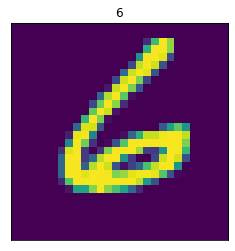

In [6]:
# Code here!
# display one random image from the training set:
class_names = ["0","1","2","3","4","5","6","7","8","9"]

idx = np.random.randint(0, X_train0.shape[0])
print(idx)
image = X_train0[idx]
plt.imshow(image) #, cmap=plt.get_cmap('gray'))
plt.title(class_names[y_train0[idx]])
plt.xticks([])
plt.yticks([])
plt.show()

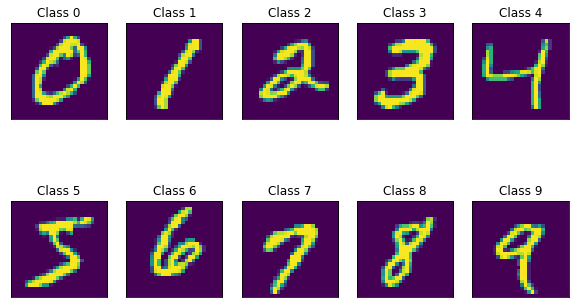

In [7]:
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = X_train0[y_train0 == i]
    # print(num0_9.shape)
    plt.imshow(num0_9[0]) #, cmap='gray') #, interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])

# Design CNN

### import models, layers, callbacks
- models: Sequential
- layers: Conv2D, MaxPool2D, Flatten
- callbacks: ModelCheckpoint, EarlyStopping

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

## **CNN2 + FCN2**

In [9]:
c2f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [10]:
c2f2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [12]:
# 1st Conv2D parameters
9*32 + 32

320

In [13]:
# 2nd Conv2D parameters
32*64*3*3 + 64

18496

In [16]:
cp_callback = callbacks.ModelCheckpoint(filepath="./mnist_c2f2_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=50)    # patience=10, 20, 50

In [17]:
# Train CNN model
# Find and save the best model.
hist = c2f2.fit(X_train, y_train, epochs = 500 , batch_size =32, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0086 - accuracy: 0.9972 - val_loss: 0.0283 - val_accuracy: 0.9912
Epoch 2/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0063 - accuracy: 0.9979 - val_loss: 0.0368 - val_accuracy: 0.9916
Epoch 3/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0062 - accuracy: 0.9979 - val_loss: 0.0300 - val_accuracy: 0.9926
Epoch 4/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0.0343 - val_accuracy: 0.9924
Epoch 5/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0062 - accuracy: 0.9979 - val_loss: 0.0451 - val_accuracy: 0.9913
Epoch 6/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.0352 - val_accuracy: 0.9924
Epoch 7/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0053 - accuracy: 0.9984 - val_loss: 0.0381 - val_ac

In [18]:
c2f2.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0850 - accuracy: 0.9925


[0.08495821803808212, 0.9925000071525574]

## Graph of loss and accuracy
- model: C2F2

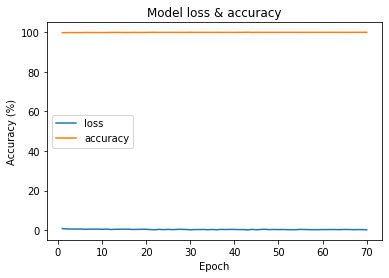

In [19]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 70
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [20]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

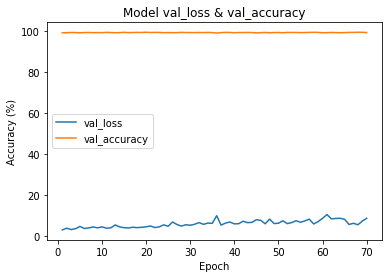

In [21]:
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

In [23]:
np.argmax(np.array(vacc_list)) # vacc_list : 검증정확도 리스트

19

In [24]:
vacc_list[np.argmax(np.array(vacc_list))] # 정확도 값

99.39000010490417

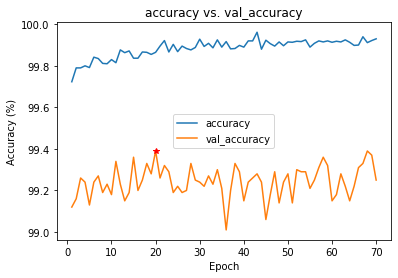

In [25]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')
# 검증 정확도가 가장 높은 부분 마커 표시
plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*') 

## 최적화된 모형 불러와서 이용

- callbacks.ModelCheckpoint를 이용해서 트레이닝 중 val_accuacy가 가장 높은 모형을 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

mnist_c2f2_best_weights.020-0.9939.hdf5

In [ ]:
# c2f2.save('cnn_best.hdf5')

In [26]:
from keras.models import load_model

model = load_model('mnist_c2f2_best_weights.020-0.9939.hdf5')
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0438 - accuracy: 0.9939


[0.043757110834121704, 0.9939000010490417]

## [DIY] C2F3의 best model을 구하시오.

## **CNN2 + FCN3**

In [27]:
c2f3 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(64, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [28]:
c2f3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               401536    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [29]:
# 1st Conv2D parameters
9*32 + 32

320

In [30]:
# 2nd Conv2D parameters
32*64*3*3 + 64

18496

In [31]:
cp_callback = callbacks.ModelCheckpoint(filepath="./mnist_c2f3_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=50)    # patience=10, 20, 50

In [32]:
# Train CNN model
# Find and save the best model.
hist = c2f3.fit(X_train, y_train, epochs = 500 , batch_size =32, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2125 - accuracy: 0.9355 - val_loss: 0.0477 - val_accuracy: 0.9847
Epoch 2/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0721 - accuracy: 0.9792 - val_loss: 0.0412 - val_accuracy: 0.9874
Epoch 3/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0532 - accuracy: 0.9842 - val_loss: 0.0304 - val_accuracy: 0.9900
Epoch 4/500
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0420 - accuracy: 0.9873 - val_loss: 0.0343 - val_accuracy: 0.9891
Epoch 5/500
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0353 - accuracy: 0.9897 - val_loss: 0.0301 - val_accuracy: 0.9910
Epoch 6/500
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0293 - accuracy: 0.9914 - val_loss: 0.0229 - val_accuracy: 0.9925
Epoch 7/500
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0258 - accuracy: 0.9923 - val_loss: 0.0283 - val_ac

In [33]:
c2f3.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 1s 2ms/step - loss: 0.1332 - accuracy: 0.9916


[0.13318796455860138, 0.991599977016449]

## Graph of loss and accuracy
- model: C2F3

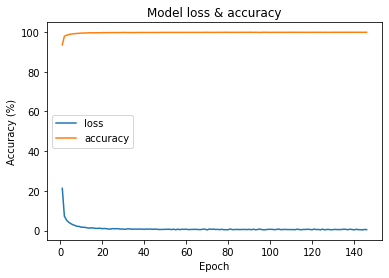

In [34]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 146
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [35]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

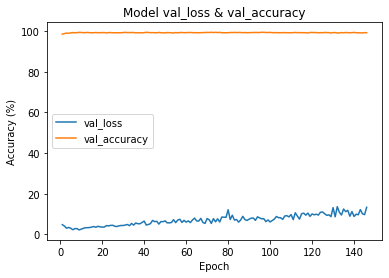

In [36]:
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

In [37]:
np.argmax(np.array(vacc_list)) # vacc_list : 검증정확도 리스트

95

In [38]:
vacc_list[np.argmax(np.array(vacc_list))] # 정확도 값

99.40999746322632

## 최적화된 모형 불러와서 이용

- callbacks.ModelCheckpoint를 이용해서 트레이닝 중 val_accuacy가 가장 높은 모형을 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

mnist_c2f3_best_weights.096-0.9941.hdf5

In [ ]:
# c2f3.save('cnn_best.hdf5')

In [39]:
from keras.models import load_model

model = load_model('mnist_c2f3_best_weights.096-0.9941.hdf5')
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0765 - accuracy: 0.9941


[0.07648632675409317, 0.9940999746322632]

***